<a href="https://colab.research.google.com/github/Malachirag/Final-Project/blob/main/ALL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#checked the size of images
from PIL import Image
import os

# Define your dataset directory
dataset_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data"

# Function to get the size of all images in a directory
def get_image_sizes(directory):
    sizes = []

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    # Load the image
                    img_path = os.path.join(subdir_path, filename)
                    img = Image.open(img_path)

                    # Get the size of the image
                    img_size = img.size
                    sizes.append((img_path, img_size))

    return sizes

# Call the function to get image sizes in the dataset directory
image_sizes = get_image_sizes(dataset_dir)

# Print the image sizes
for img_path, img_size in image_sizes:
    print(f"Image: {img_path}, Size: {img_size}")


Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-106.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-118.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-123.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-121.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-117.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-114.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-112.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-101.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-120.jpg, Size: (224, 224)
Image: /content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign/WBC-Benign-122.jpg, Size: (224, 224)
Image: /content/driv

Data **preprocessing**

In [ ]:
#image resizing
from PIL import Image
import os

# Define your dataset directory
dataset_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data"

# Define the target size for resizing
target_size = (224, 224)  # Adjust as needed

# Function to resize all images in a directory
def resize_images_in_directory(directory, target_size):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    # Load the image
                    img_path = os.path.join(subdir_path, filename)
                    img = Image.open(img_path)

                    # Resize the image
                    resized_img = img.resize(target_size)

                    # Save the resized image (overwrite the original or save to a new directory)
                    resized_img.save(img_path)

# Call the function to resize images in the dataset directory
resize_images_in_directory(dataset_dir, target_size)


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define your main dataset directory
main_dataset_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data"

# Define the directories for benign and pro images
benign_dir = os.path.join(main_dataset_dir, "Benign")
pro_dir = os.path.join(main_dataset_dir, "Pro")

# Define the directories for training and test sets
train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Train"
test_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Test"

# Create the training and test directories
os.makedirs(os.path.join(train_dir, "Benign"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "Pro"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Benign"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Pro"), exist_ok=True)

# Function to split the dataset into training and test sets
def split_dataset(src_dir, train_dst, test_dst, test_size=0.2, random_state=42):
    # Get the list of all image files in the source directory
    all_images = [f for f in os.listdir(src_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Split the images into training and test sets
    train_images, test_images = train_test_split(all_images, test_size=test_size, random_state=random_state)

    # Copy images to the training set
    for img in train_images:
        src_path = os.path.join(src_dir, img)
        dst_path = os.path.join(train_dst, img)
        shutil.copy(src_path, dst_path)

    # Copy images to the test set
    for img in test_images:
        src_path = os.path.join(src_dir, img)
        dst_path = os.path.join(test_dst, img)
        shutil.copy(src_path, dst_path)

# Split the dataset for benign images
split_dataset(benign_dir, os.path.join(train_dir, "Benign"), os.path.join(test_dir, "Benign"))

# Split the dataset for pro images
split_dataset(pro_dir, os.path.join(train_dir, "Pro"), os.path.join(test_dir, "Pro"))


In [ ]:
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Train"
test_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Test"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(train_dir)
num_test_images = count_images_in_directory(test_dir)

# Print the results
print(f"Number of images in the train dataset: {num_train_images}")
print(f"Number of images in the test dataset: {num_test_images}")


Number of images in the train dataset: 1046
Number of images in the test dataset: 262


In [ ]:
#Image count before splitting in each of the classes
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Benign"
test_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Pro"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(train_dir)
num_test_images = count_images_in_directory(test_dir)

# Print the results
print(f"Number of images in the benign dataset: {num_train_images}")
print(f"Number of images in the pro dataset: {num_test_images}")


Number of images in the benign dataset: 504
Number of images in the pro dataset: 804


In [ ]:
#Image count after splitting in each of the classes
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Train/Benign"
test_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Train/Pro"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(train_dir)
num_test_images = count_images_in_directory(test_dir)

# Print the results
print(f"Number of images in the benign dataset: {num_train_images}")
print(f"Number of images in the pro dataset: {num_test_images}")


Number of images in the benign dataset: 403
Number of images in the pro dataset: 643


In [ ]:
!nvidia-smi

Thu Dec 14 00:34:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow

In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install tensorflow

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os

# Define the path to your original training dataset
original_train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Train"

# Define the path to your augmented training dataset
augmented_train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Augmentation"

# Create an ImageDataGenerator with augmentation parameters for the 'Benign' subfolder
datagen_benign = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

# Create an ImageDataGenerator with augmentation parameters for the 'Pro' subfolder
datagen_pro = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

# Iterate through each class (subfolder) in the original training dataset
for class_name in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_name)

    # Create separate folder for augmented images in each class
    augmented_class_path = os.path.join(augmented_train_dir, class_name)
    os.makedirs(augmented_class_path, exist_ok=True)

    # Set the appropriate datagen for each class
    if class_name == 'Benign':
        current_datagen = datagen_benign
        augment_count = 8
    elif class_name == 'Pro':
        current_datagen = datagen_pro
        augment_count = 5

    # Iterate through images in the original class folder
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images and save to the new folder
        i = 0
        for batch in current_datagen.flow(x, batch_size=1, save_to_dir=augmented_class_path, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= augment_count:
                break  # This ensures that we generate the specified number of augmented images for each original image


In [ ]:
#Image count after data augmentaion in separate classes
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Augmentation/Benign"
test_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Augmentation/Pro"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(train_dir)
num_test_images = count_images_in_directory(test_dir)

# Print the results
print(f"Number of images in the benign dataset: {num_train_images}")
print(f"Number of images in the pro dataset: {num_test_images}")


Number of images in the benign dataset: 2765
Number of images in the pro dataset: 2764


Found 5529 images belonging to 2 classes.
Found 262 images belonging to 2 classes.


Epoch 1/20
172/172 [==============================] - 91s 501ms/step - loss: 4.7881 - accuracy: 0.6937 - val_loss: 0.8963 - val_accuracy: 0.7891
Epoch 2/20
172/172 [==============================] - 85s 496ms/step - loss: 1.5611 - accuracy: 0.7384 - val_loss: 1.5267 - val_accuracy: 0.8047
Epoch 3/20
172/172 [==============================] - 84s 488ms/step - loss: 1.1475 - accuracy: 0.7875 - val_loss: 0.9228 - val_accuracy: 0.7891
Epoch 4/20
172/172 [==============================] - 86s 500ms/step - loss: 0.9040 - accuracy: 0.7990 - val_loss: 0.5697 - val_accuracy: 0.8750
Epoch 5/20
172/172 [==============================] - 86s 499ms/step - loss: 0.8646 - accuracy: 0.8095 - val_loss: 0.7958 - val_accuracy: 0.8516
Epoch 6/20
172/172 [==============================] - 88s 511ms/step - loss: 0.8077 - accuracy: 0.8179 - val_loss: 1.0932 - val_accuracy: 0.8047
Epoch 7/20
172/172 [==============================] - 85s 490ms/step - loss: 0.9436 - accuracy: 0.8001 - val_loss: 0.7884 - val_ac

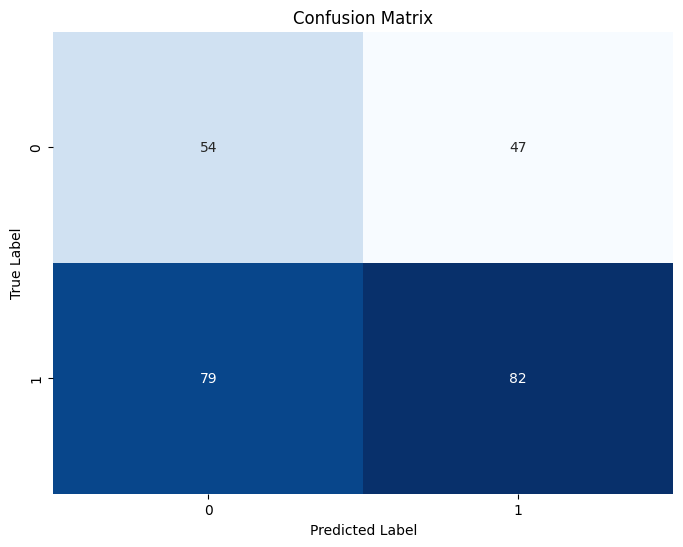

In [ ]:
#XCEPTION
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to your augmented and resized dataset
train_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Augmentation'
test_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Test'

# Define image size and batch size
image_size = (224, 224)  # Adjust based on the input size expected by Xception
batch_size = 32

# Create an ImageDataGenerator for data normalization (no need for rescaling)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate training dataset
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Generate test dataset
test_generator = datagen.flow_from_directory(
    test_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Build Xception model with a custom dense layer for binary classification
base_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs
)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)

# True labels
true_labels = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
class_report = classification_report(true_labels, predicted_labels)
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Found 5529 images belonging to 2 classes.
Found 262 images belonging to 2 classes.


Epoch 1/10
172/172 [==============================] - 95s 508ms/step - loss: 0.2696 - accuracy: 0.9360 - val_loss: 0.1671 - val_accuracy: 0.9336
Epoch 2/10
172/172 [==============================] - 91s 529ms/step - loss: 0.0847 - accuracy: 0.9700 - val_loss: 0.0889 - val_accuracy: 0.9688
Epoch 3/10
172/172 [==============================] - 89s 517ms/step - loss: 0.0373 - accuracy: 0.9867 - val_loss: 0.0412 - val_accuracy: 0.9844
Epoch 4/10
172/172 [==============================] - 87s 503ms/step - loss: 0.0320 - accuracy: 0.9880 - val_loss: 0.0293 - val_accuracy: 0.9922
Epoch 5/10
172/172 [==============================] - 84s 487ms/step - loss: 0.0387 - accuracy: 0.9854 - val_loss: 0.1637 - val_accuracy: 0.9492
Epoch 6/10
172/172 [==============================] - 85s 491ms/step - loss: 0.0458 - accuracy: 0.9867 - val_loss: 0.0421 - val_accuracy: 0.9844
Epoch 7/10
172/172 [==============================] - 84s 489ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0273 - val_ac

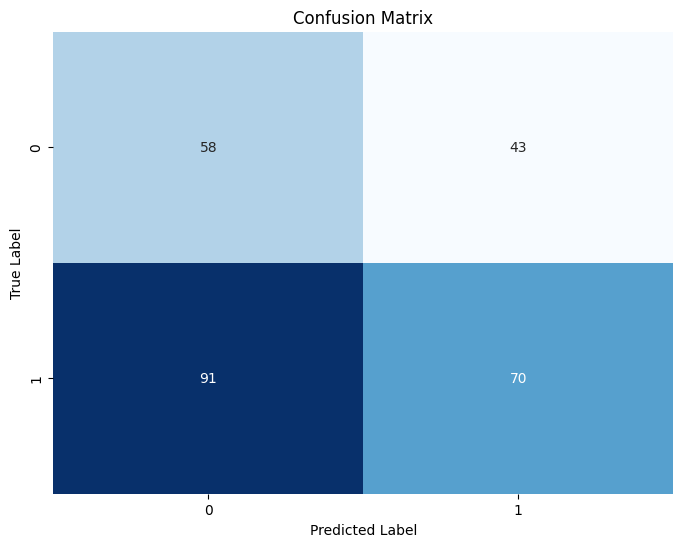

In [ ]:
#DENSENET
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to your augmented and resized dataset
train_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Augmentation'
test_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Test'

# Define image size and batch size
image_size = (224, 224)  # Adjust based on the input size expected by DenseNet
batch_size = 32

# Create an ImageDataGenerator for data normalization (no need for rescaling)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate training dataset
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Generate test dataset
test_generator = datagen.flow_from_directory(
    test_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Build DenseNet model with a custom dense layer for binary classification
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)

# True labels
true_labels = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
class_report = classification_report(true_labels, predicted_labels)
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Found 5529 images belonging to 2 classes.
Found 262 images belonging to 2 classes.
94765736/94765736 [==============================] - 1s 0us/step


Epoch 1/10
172/172 [==============================] - 93s 494ms/step - loss: 0.0623 - accuracy: 0.9782 - val_loss: 0.0097 - val_accuracy: 0.9961
Epoch 2/10
172/172 [==============================] - 85s 490ms/step - loss: 0.0233 - accuracy: 0.9916 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/10
172/172 [==============================] - 89s 520ms/step - loss: 0.0131 - accuracy: 0.9947 - val_loss: 0.0117 - val_accuracy: 0.9961
Epoch 4/10
172/172 [==============================] - 87s 508ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 5/10
172/172 [==============================] - 83s 483ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 6/10
172/172 [==============================] - 82s 479ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 4.7716e-04 - val_accuracy: 1.0000
Epoch 7/10
172/172 [==============================] - 83s 485ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0351 - va

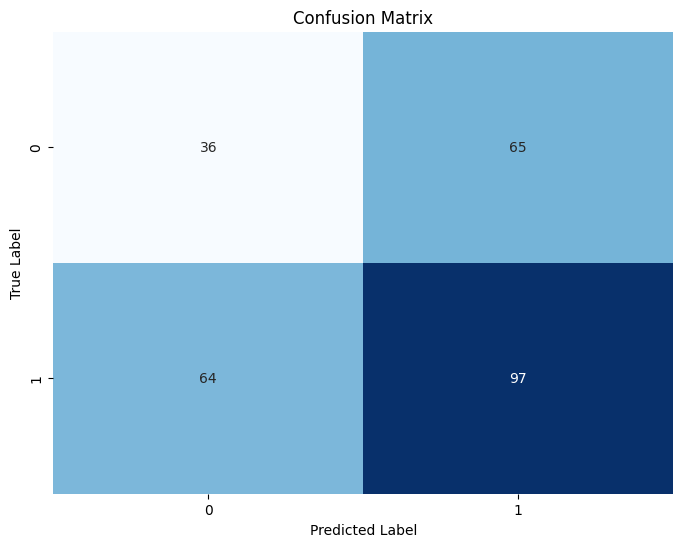

In [ ]:
#RESNET
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to your augmented and resized dataset
train_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Augmentation'
test_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Test'

# Define image size and batch size
image_size = (224, 224)  # Adjust based on the input size expected by ResNet50
batch_size = 32

# Create an ImageDataGenerator for data normalization (no need for rescaling)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate training dataset
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Generate test dataset
test_generator = datagen.flow_from_directory(
    test_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Build ResNet50 model with a custom dense layer for binary classification
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)

# True labels
true_labels = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
class_report = classification_report(true_labels, predicted_labels)
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Found 5529 images belonging to 2 classes.
Found 262 images belonging to 2 classes.


Epoch 1/10
172/172 [==============================] - 85s 478ms/step - loss: 0.2184 - accuracy: 0.9145 - val_loss: 0.0983 - val_accuracy: 0.9648
Epoch 2/10
172/172 [==============================] - 78s 455ms/step - loss: 0.1103 - accuracy: 0.9605 - val_loss: 0.1247 - val_accuracy: 0.9648
Epoch 3/10
172/172 [==============================] - 82s 478ms/step - loss: 0.0861 - accuracy: 0.9698 - val_loss: 0.0643 - val_accuracy: 0.9844
Epoch 4/10
172/172 [==============================] - 82s 477ms/step - loss: 0.0643 - accuracy: 0.9802 - val_loss: 0.0499 - val_accuracy: 0.9766
Epoch 5/10
172/172 [==============================] - 81s 469ms/step - loss: 0.0625 - accuracy: 0.9782 - val_loss: 0.0516 - val_accuracy: 0.9844
Epoch 6/10
172/172 [==============================] - 81s 470ms/step - loss: 0.0685 - accuracy: 0.9743 - val_loss: 0.0684 - val_accuracy: 0.9844
Epoch 7/10
172/172 [==============================] - 79s 458ms/step - loss: 0.0615 - accuracy: 0.9798 - val_loss: 0.0884 - val_ac

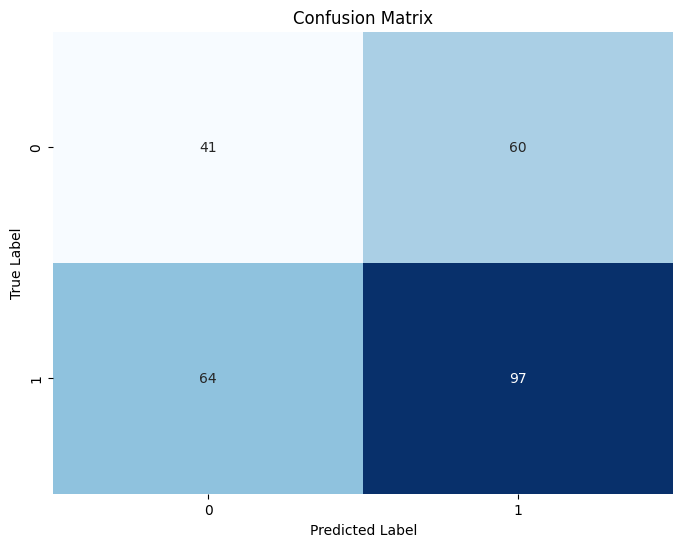

In [ ]:
#MOBILENET
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to your augmented and resized dataset
train_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Augmentation'
test_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Test'

# Define image size and batch size
image_size = (224, 224)  # Adjust based on the input size expected by MobileNetV2
batch_size = 32

# Create an ImageDataGenerator for data normalization (no need for rescaling)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate training dataset
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Generate test dataset
test_generator = datagen.flow_from_directory(
    test_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Build MobileNetV2 model with a custom dense layer for binary classification
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)

# True labels
true_labels = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
class_report = classification_report(true_labels, predicted_labels)
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#INCEPTION
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to your augmented and resized dataset
train_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Augmentation'
test_dataset_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/Data/Test'

# Define image size and batch size
image_size = (299, 299)  # Adjust based on the input size expected by InceptionV3
batch_size = 32

# Create an ImageDataGenerator for data normalization (no need for rescaling)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate training dataset
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Generate test dataset
test_generator = datagen.flow_from_directory(
    test_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Build InceptionV3 model with a custom dense layer for binary classification
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)

# True labels
true_labels = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
class_report = classification_report(true_labels, predicted_labels)
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Found 5529 images belonging to 2 classes.
Found 262 images belonging to 2 classes.


Epoch 1/10
172/172 [==============================] - 384s 2s/step - loss: 2.2398 - accuracy: 0.7384 - val_loss: 0.5242 - val_accuracy: 0.8555
Epoch 2/10
172/172 [==============================] - ETA: 0s - loss: 0.7445 - accuracy: 0.8053

In [ ]:
#EfficientNet
